# Exploration of the shap values

In [43]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


467 administrations left.


,id
diagnosis,
0.0,417
1.0,50


Saving experiment in folder Records.
Doing experiment 2!


,experiment_name,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Corrected Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV),TP,TN,FP,FN
0,Records,0.856,0.471,0.905,0.197,0.967,0.485,0.279,0.854,0.423,0.64,0.88,0.39,0.11,0.953,0.36,0.61,0.047,32,367,50,18


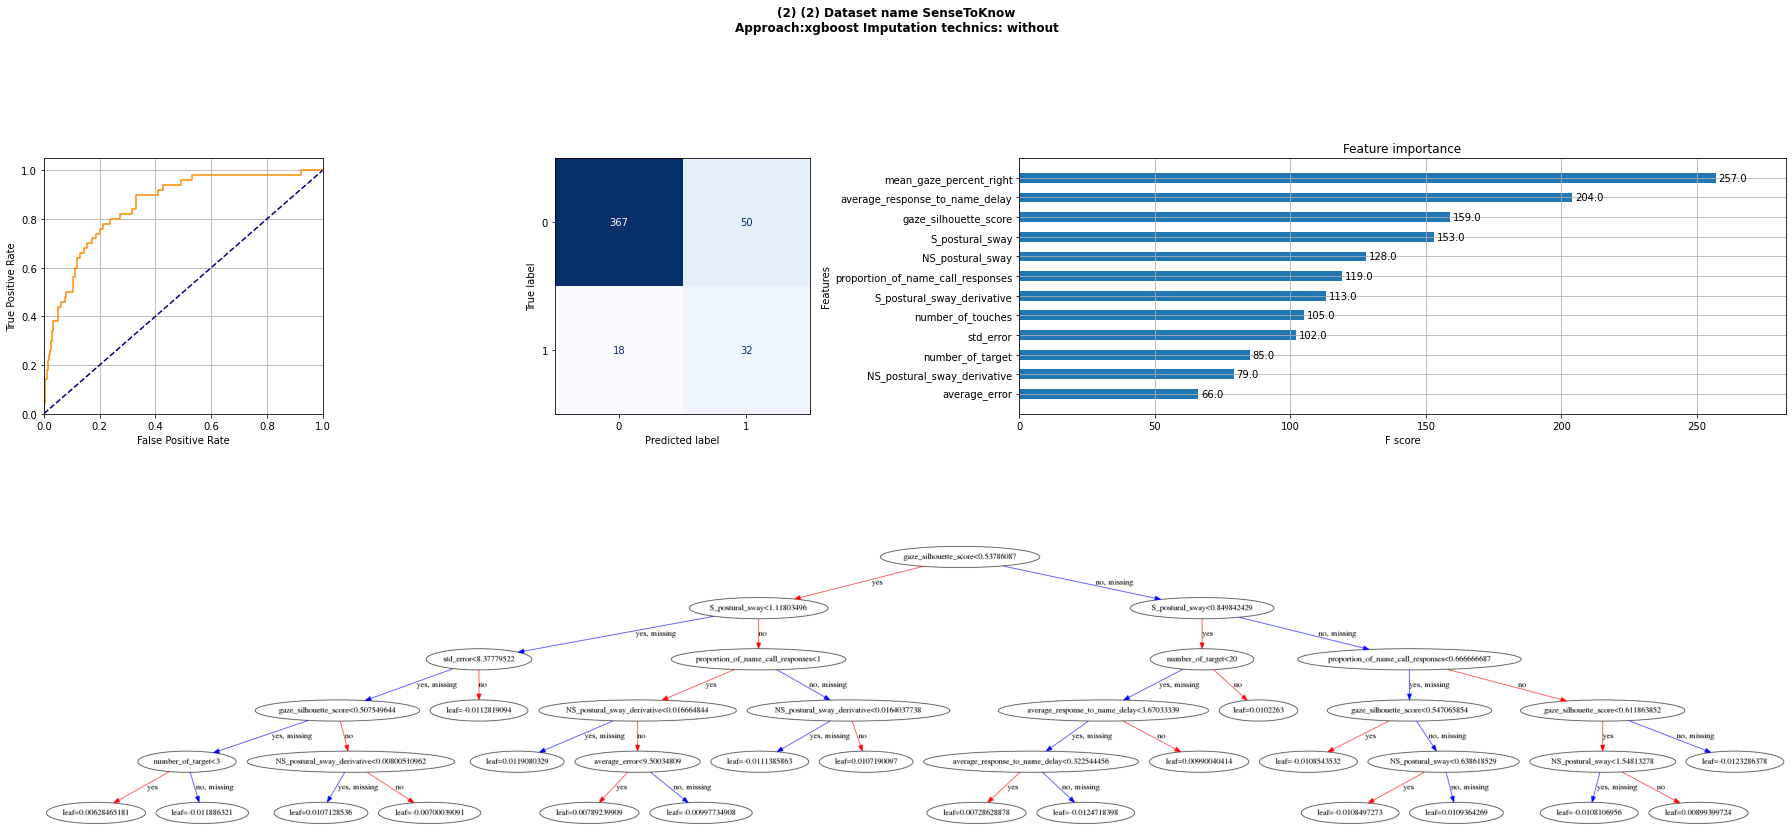

In [41]:
df =  pd.read_csv(AUTISM_DATA_PATH)


data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS, 
               verbosity=0,
               scenario='multimodal_2023',#'papers',
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=None, #21,#7,#5,#4,#None,#3,    
                    experiment_folder_name = 'Records',
                    experiment_name = 'Records',
                    verbosity=1, 
                    debug=True, 
                    save_experiment=True)
exp.fit_predict(num_cv='loocv')#num_cv='loocv')#num_cv='loocv')

exp.plot()

In [6]:
exp.predictions_df

,mean_gaze_percent_right,gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,S_postural_sway,NS_postural_sway,S_postural_sway_derivative,NS_postural_sway_derivative,std_error,number_of_touches,number_of_target,average_error,y_true,y_pred,TN,TP,FP,FN
0,0.326988,0.777235,0.000000,NaN,0.176733,0.326318,0.000278,0.001556,NaN,NaN,NaN,NaN,0.0,0.219663,1,0,0,0
1,0.481269,0.582087,1.000000,1.384717,0.205969,1.238350,0.000476,0.013931,7.139591,10.0,9.0,11.703175,0.0,0.187229,1,0,0,0
2,0.587493,0.696044,0.333333,1.434767,0.143356,1.029170,0.000298,0.010124,NaN,NaN,NaN,NaN,0.0,0.244735,1,0,0,0
3,0.476637,0.389954,0.500000,0.967633,4.522605,1.738577,0.023775,0.011167,12.002200,16.0,9.0,15.200465,0.0,0.529357,0,0,1,0
4,0.434169,0.393004,1.000000,0.556111,2.978287,2.007431,0.016263,0.006172,6.715827,9.0,7.0,11.981659,0.0,0.498791,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0.540835,0.698828,0.666667,0.800800,0.236908,0.374640,0.000445,0.003553,4.574844,23.0,20.0,7.391424,1.0,0.188365,0,0,0,1
463,0.381880,0.452298,0.000000,NaN,2.839317,0.858109,0.015335,0.004834,7.245365,9.0,9.0,10.427951,1.0,0.539290,0,1,0,0
464,0.712607,0.379375,0.333333,0.266933,1.900183,3.418744,0.012617,0.019875,6.935878,6.0,5.0,9.480854,1.0,0.695757,0,1,0,0
465,0.517195,0.348552,1.000000,1.412522,2.695229,3.268104,0.013331,0.021143,14.625799,52.0,20.0,19.630937,1.0,0.516358,0,1,0,0


## SHAP Summary Plot¶


The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of being autistic for the trained XGBoost model. 

This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in risk.

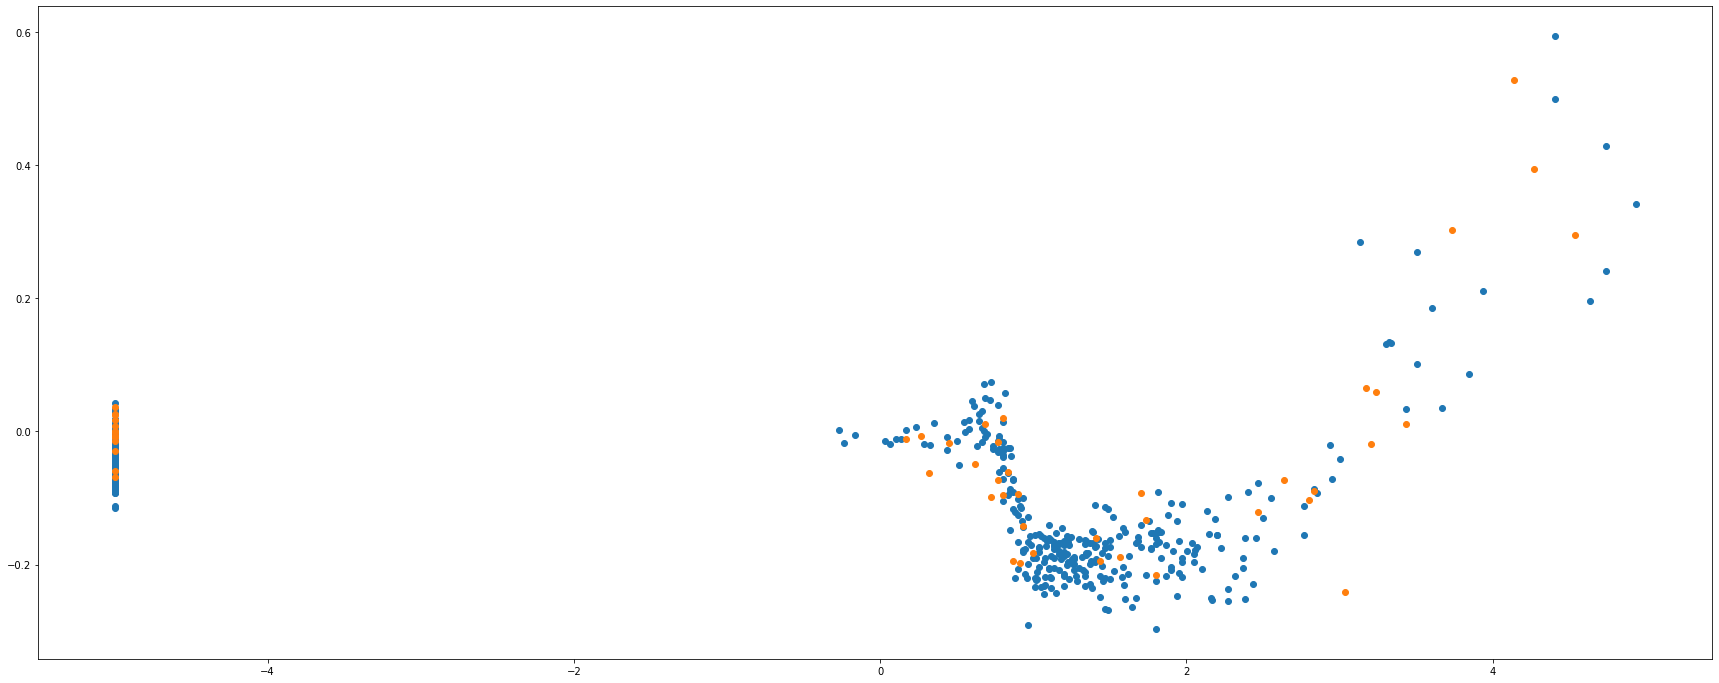

In [12]:
fi(30, 12)
plt.scatter(exp.dataset.X_train[exp.dataset.y_train==0, 3], exp.shap_values[exp.dataset.y_train==0, 3], color='tab:blue')
plt.scatter(exp.dataset.X_train[exp.dataset.y_train==1, 3], exp.shap_values[exp.dataset.y_train==1, 3], color='tab:orange')

In [32]:
from scipy.stats import mannwhitneyu

mannwhitneyu(d[(~d['x'].isna()) & (d['age'] < 37) & (d['age'] >= 18) & (d['y']==0)]['x'], d[(~d['x'].isna()) &  (d['age'] < 37) & (d['age'] >= 18) & (d['y']==0)]['x'])

MannwhitneyuResult(statistic=40612.5, pvalue=1.0)

In [ ]:
fi(25, 8);ax=plt.gca()
sns.kdeplot(data=exp.dataset.df, x=feature_name, hue="diagnosis", multiple="layer", common_norm=False, alpha=.7, ax=ax, bw=.25)


<AxesSubplot:xlabel='x', ylabel='Density'>

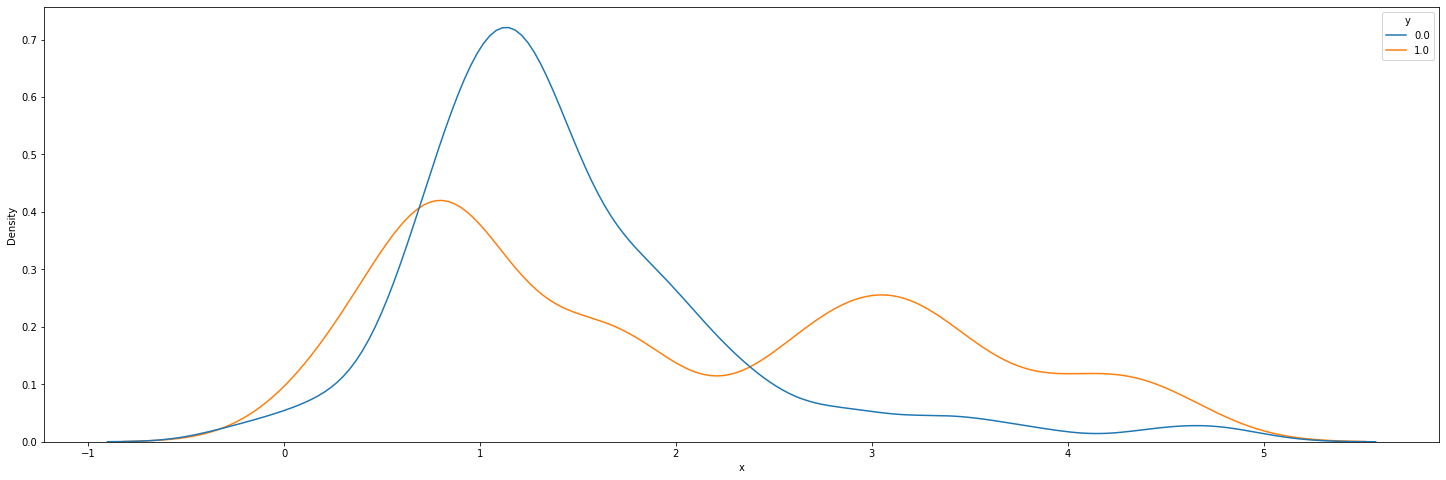

In [30]:
d = pd.DataFrame({'x': exp.dataset._X_train[:,3], 
                  'y': exp.dataset.y_train, 
                  'age':exp.dataset.df.age.to_numpy()})
fi(25, 8);ax=plt.gca()
sns.kdeplot(data=d[(d['age'] < 37) & (d['age'] >= 18)], x='x', hue="y", multiple="layer", common_norm=False, alpha=.7, ax=ax, bw=.25)


In [28]:
d

,x,y,age
0,NaN,0.0,24.262295
1,1.384717,0.0,30.754098
2,1.434767,0.0,25.245902
3,0.967633,0.0,48.688525
4,0.556111,0.0,29.901639
...,...,...,...
462,0.800800,1.0,48.327869
463,NaN,1.0,40.262295
464,0.266933,1.0,47.081967
465,1.412522,1.0,49.311475


In [19]:
np.isnan(exp.dataset._X_train[:,3])

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False,  True,

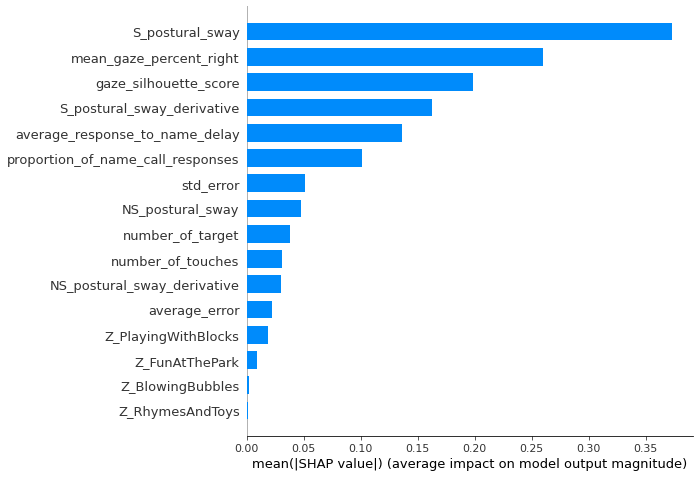

In [324]:
shap.summary_plot(exp.shap_values, exp.dataset.X_train, feature_names = exp.features_name, plot_type='bar')

In [308]:
import shap
explainer = shap.TreeExplainer(exp.model)
expected_value = explainer.expected_value
shap_values  = explainer.shap_values(exp.dataset.X_train)


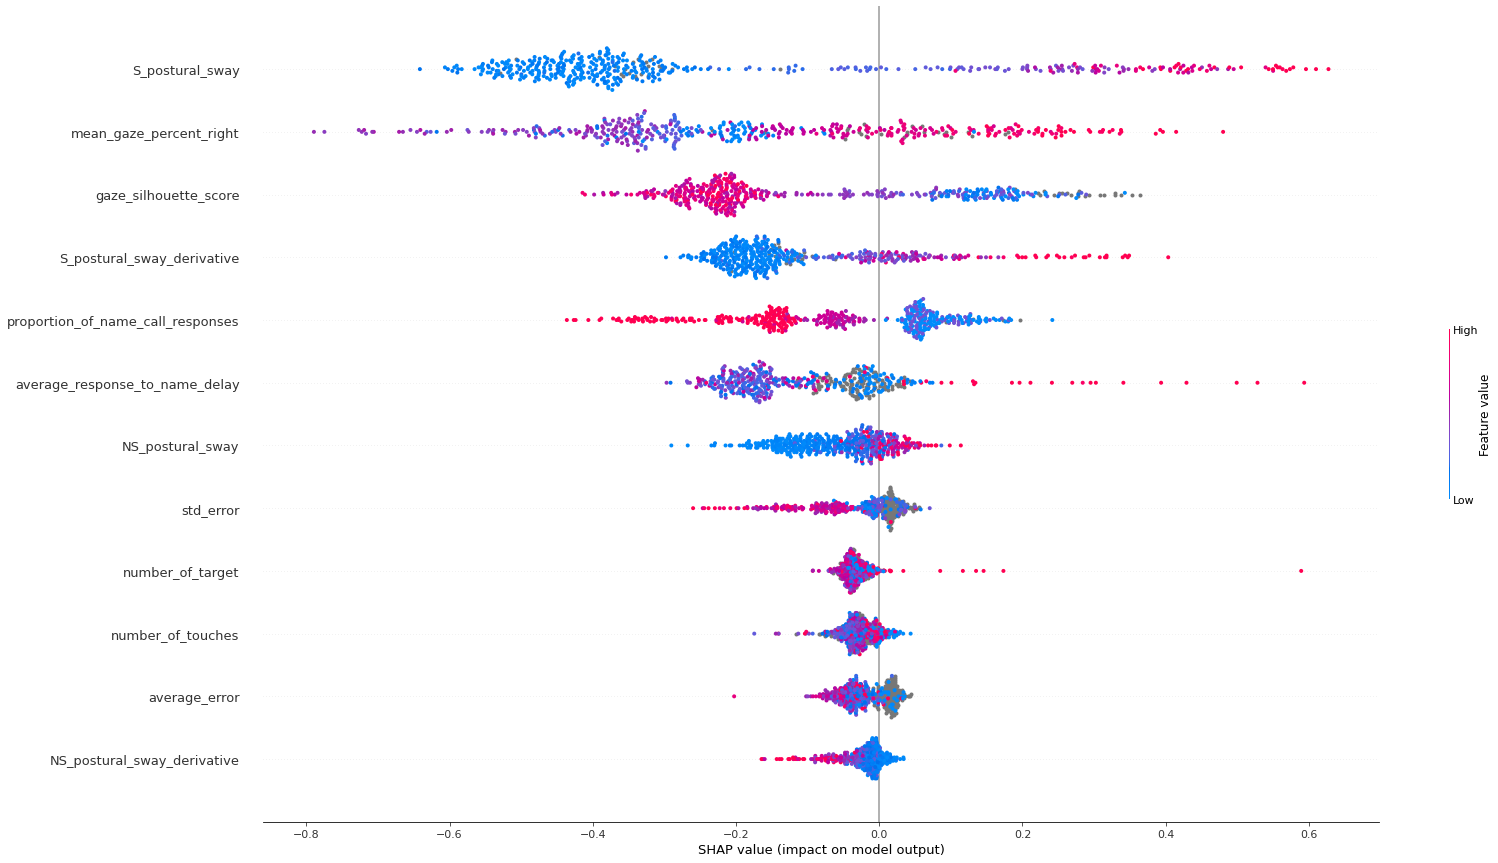

In [40]:
import shap
shap.summary_plot(exp.shap_values, exp.dataset._X_train, feature_names=exp.features_name, plot_size=(25, 15), plot_type='dot')


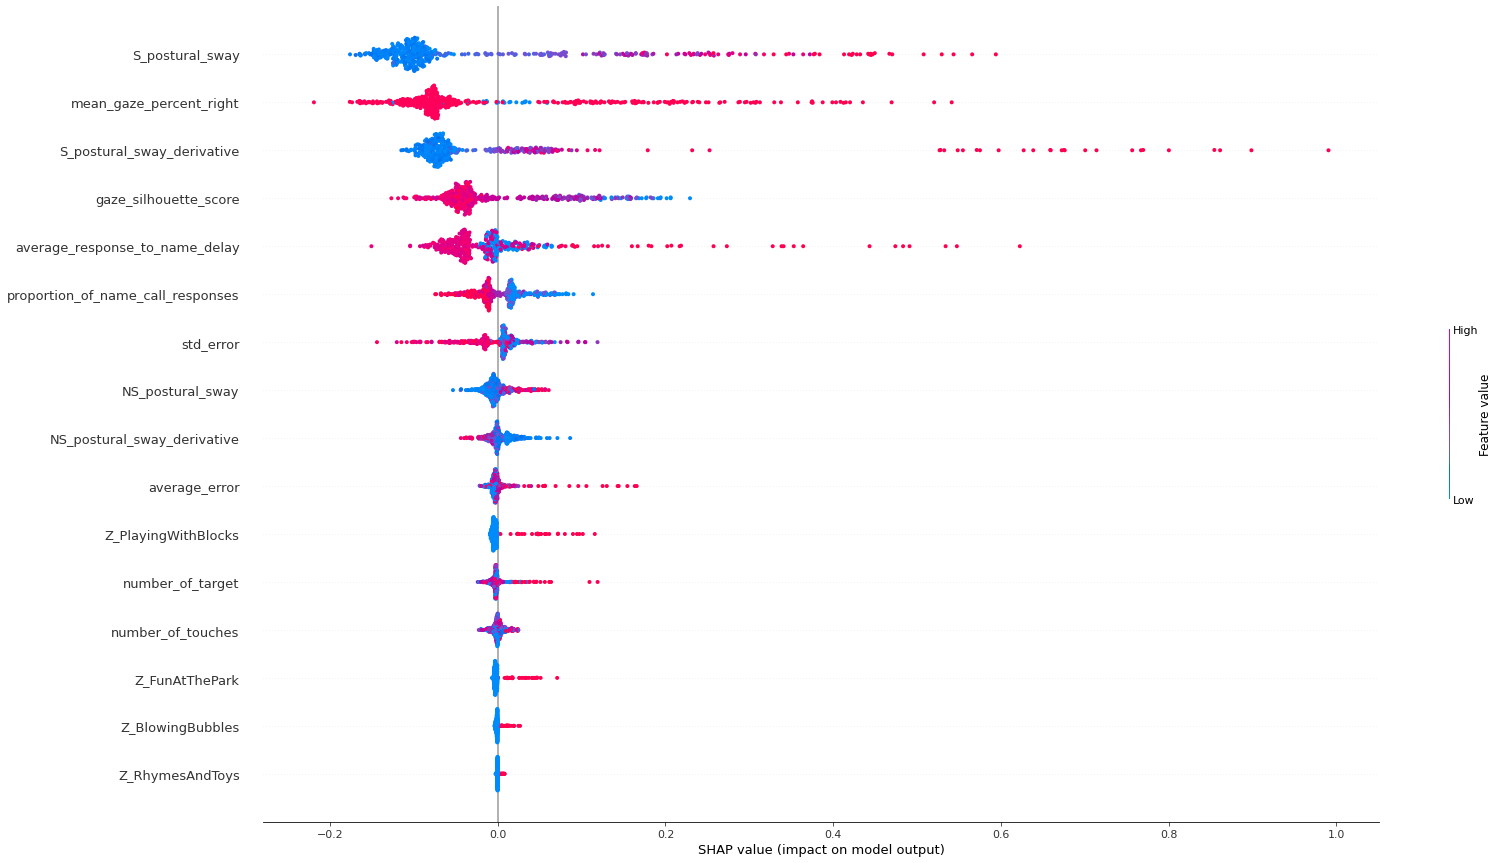

In [20]:
shap.summary_plot(exp.shap_values, exp.dataset.X_train, feature_names=exp.features_name, plot_size=(25, 15))

## SHAP Dependence Plots


While a SHAP summary plot gives a general overview of each feature a SHAP dependence plot show how the model output varies by feauture value. Note that every dot is a participant, and the vertical dispersion at a single feature value results from interaction effects in the model. The feature used for coloring is automatically chosen to highlight what might be driving these interactions. Later we will see how to check that the interaction is really in the model with SHAP interaction values. Note that the row of a SHAP summary plot results from projecting the points of a SHAP dependence plot onto the y-axis, then recoloring by the feature itself.


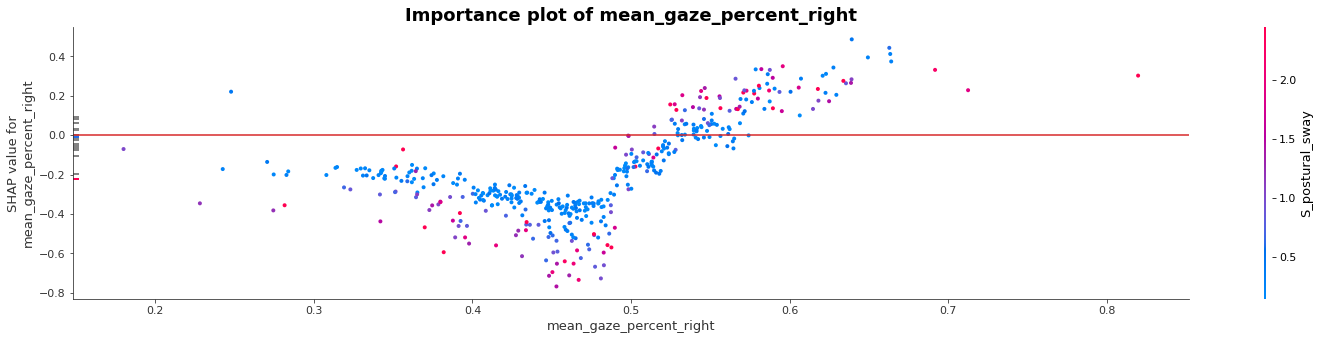

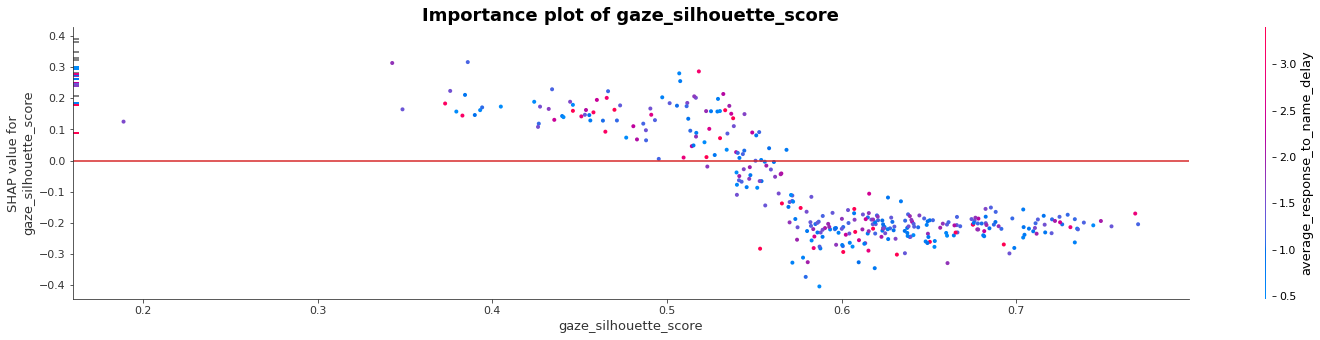

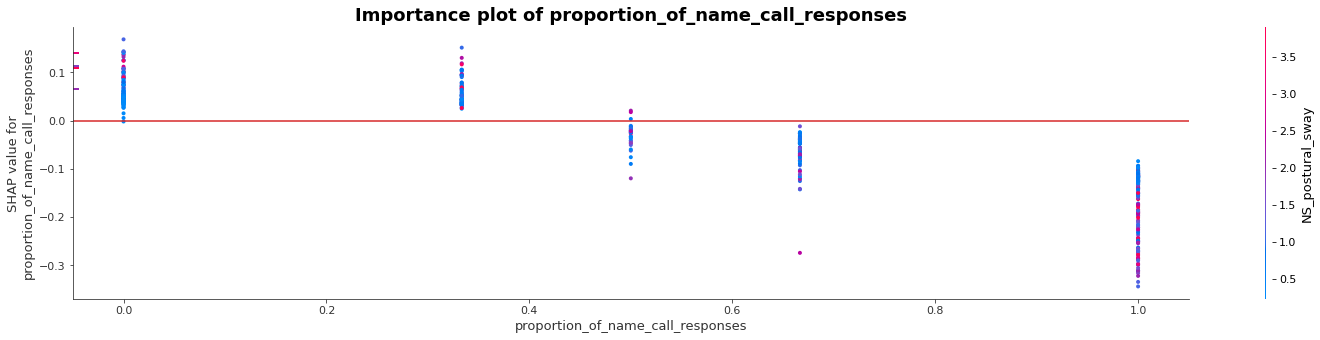

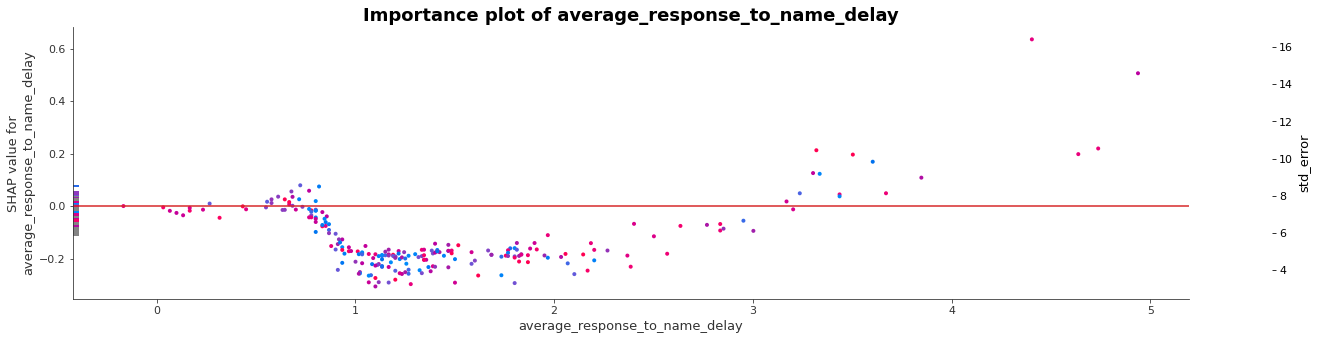

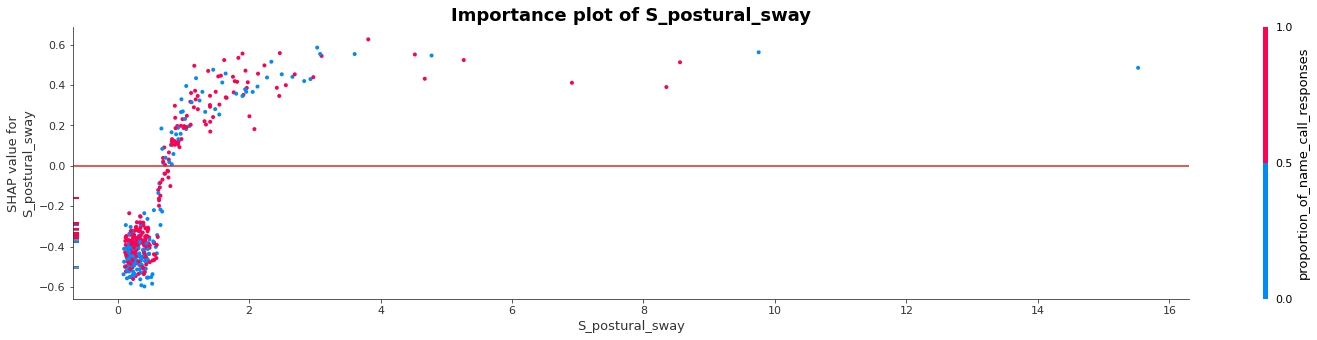

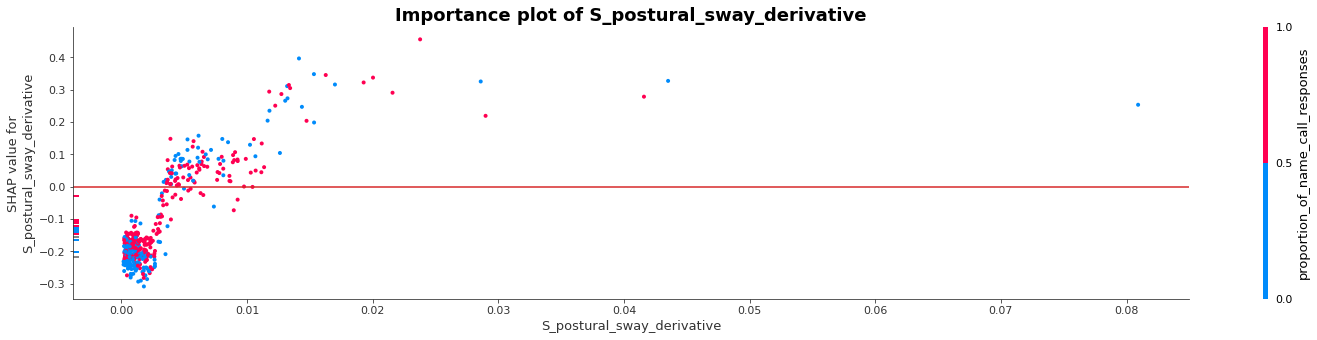

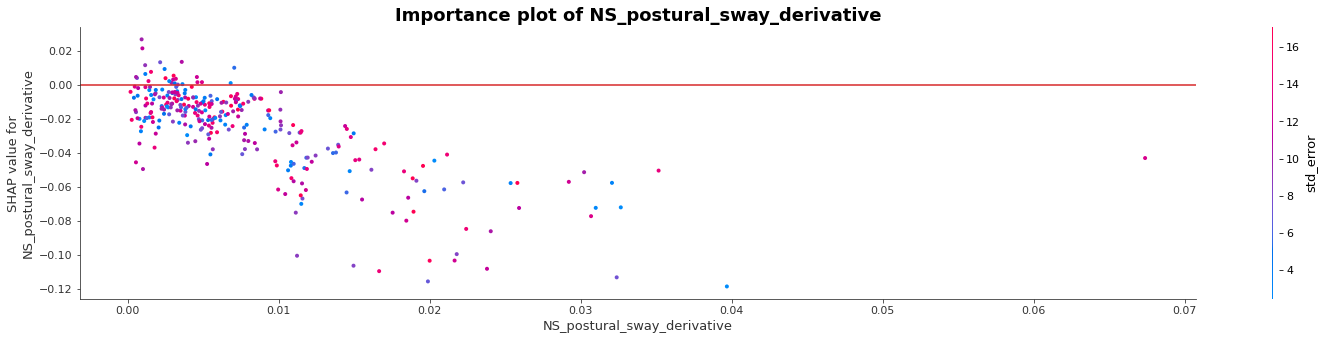

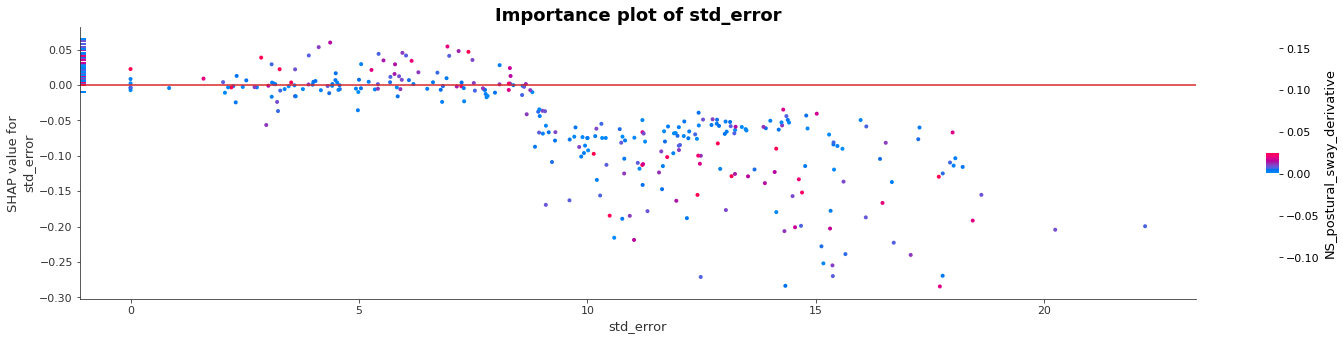

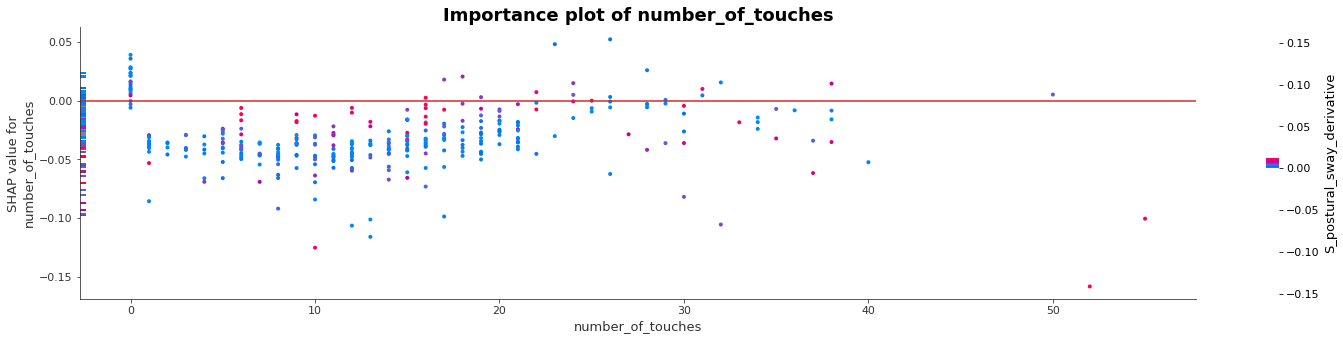

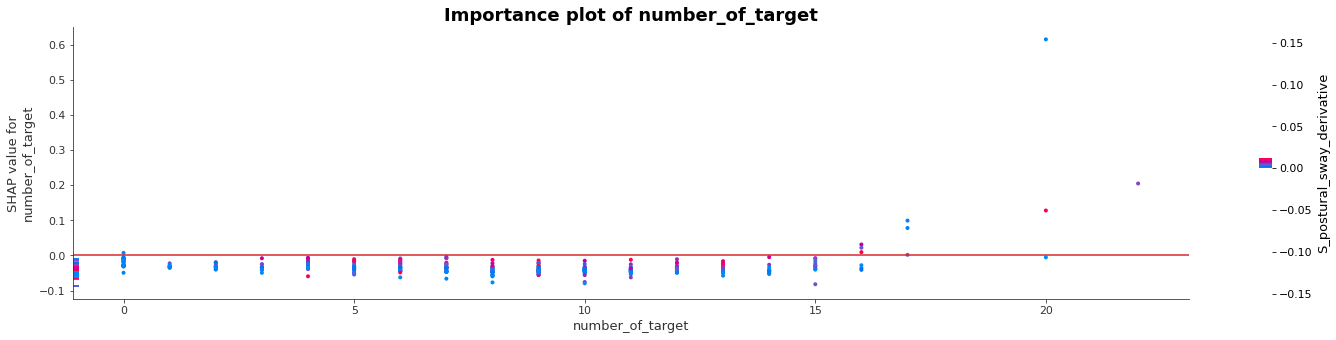

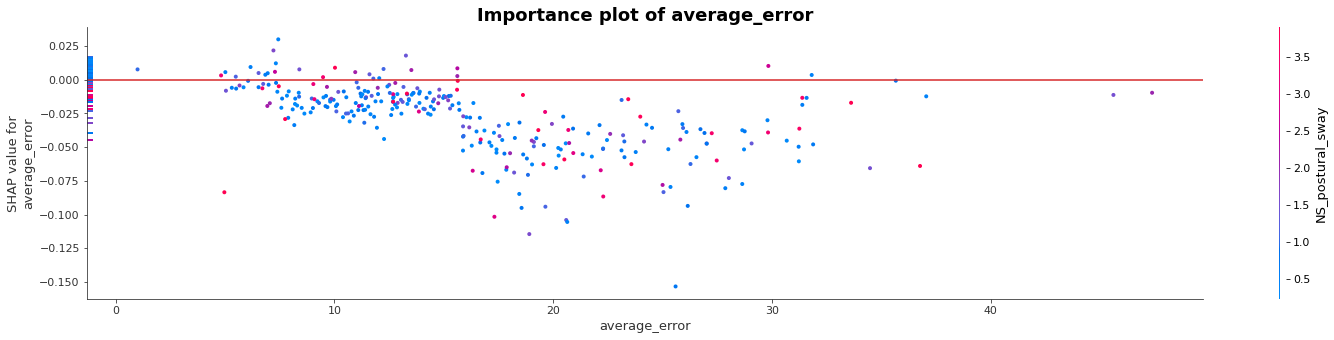

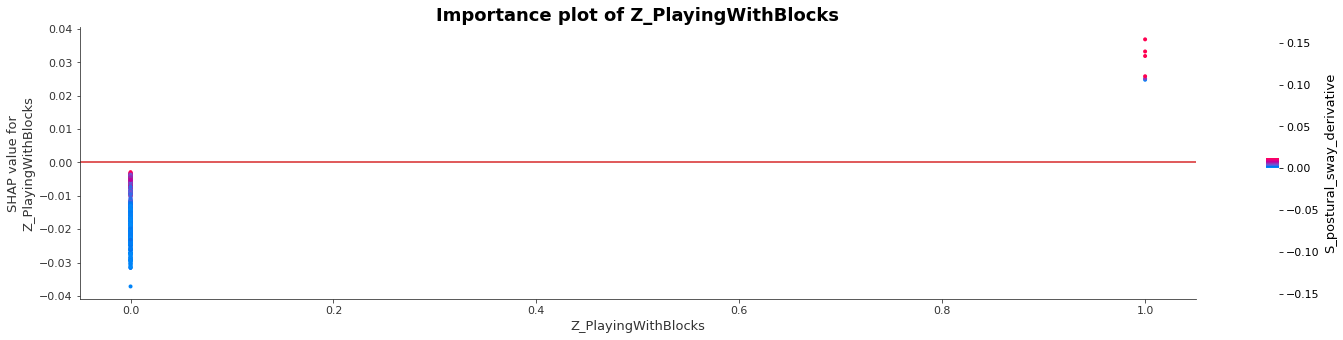

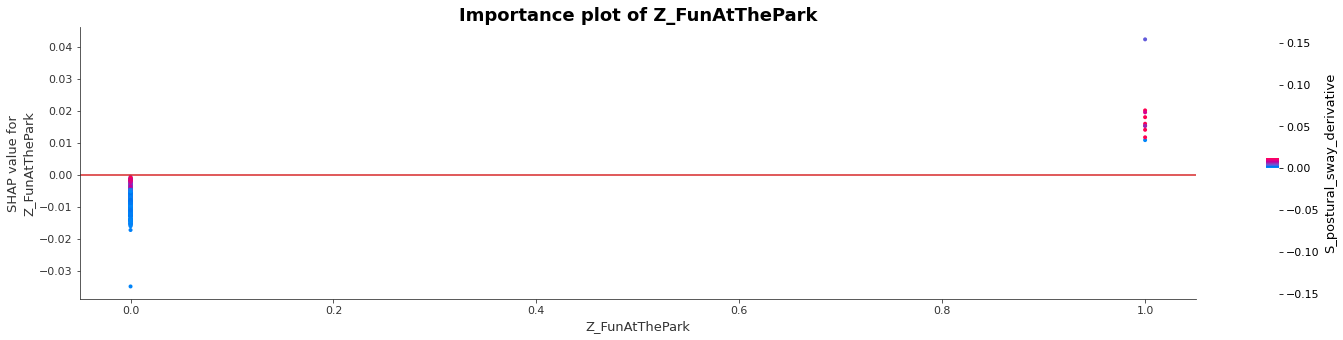

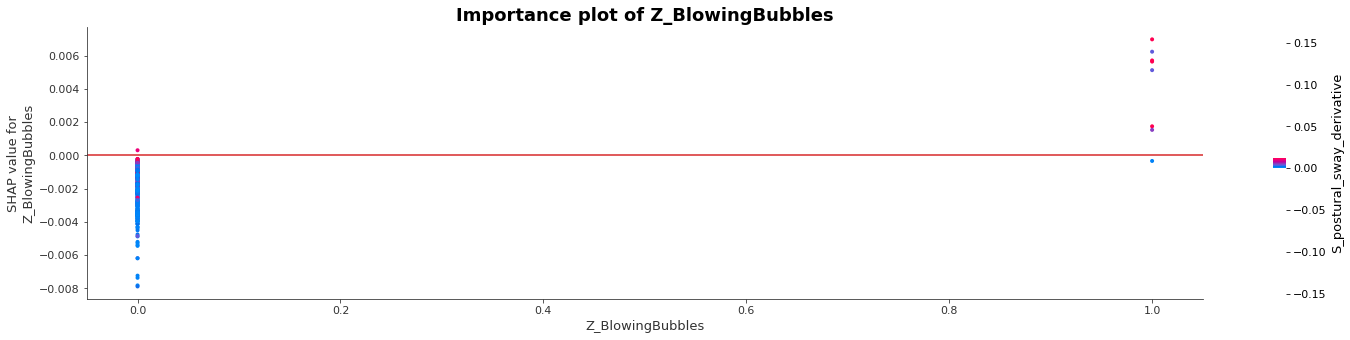

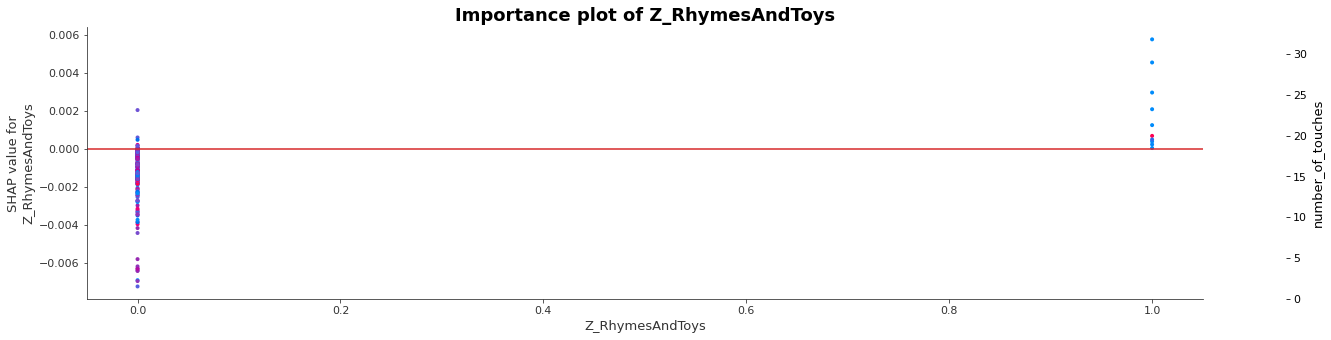

In [307]:
X = deepcopy(exp.dataset.X_train)
X[X==-5] = np.nan
for feat in exp.features_name:
    if feat =='NS_postural_sway':
        continue
    
    fig, ax = plt.subplots(1, 1, figsize=(25, 5))
    ax.axhline(0, color='tab:red')
    ax.set_title("Importance plot of {}".format(feat), weight='bold', fontsize=18)
    shap.dependence_plot(feat, exp.shap_values, X, feature_names=exp.features_name, ax=ax)

# Comparisons of the Shap values between cross-validation and when fitting with all the data

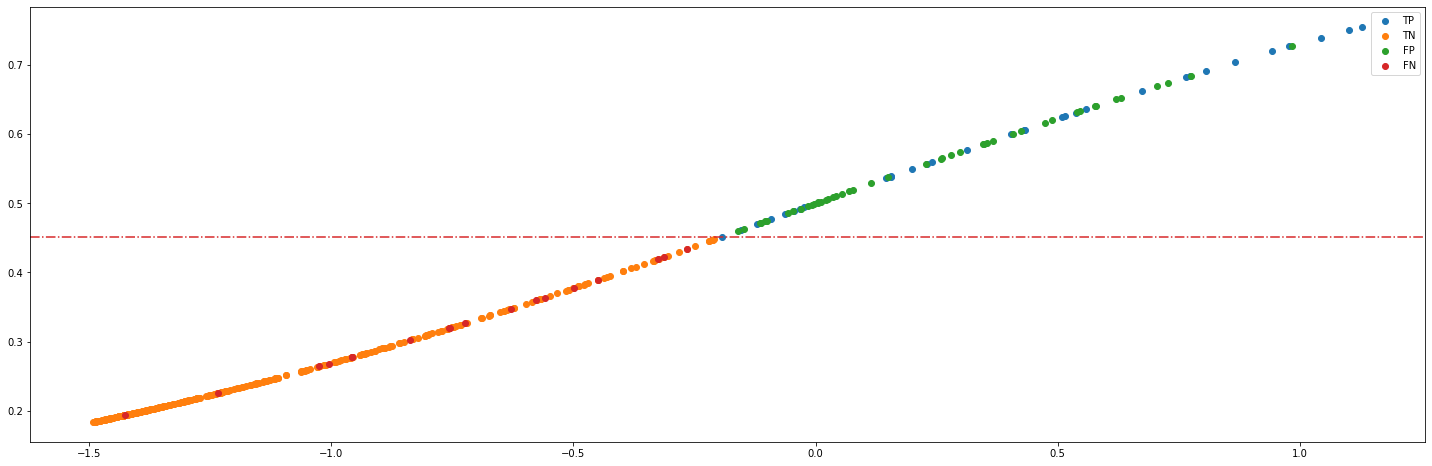

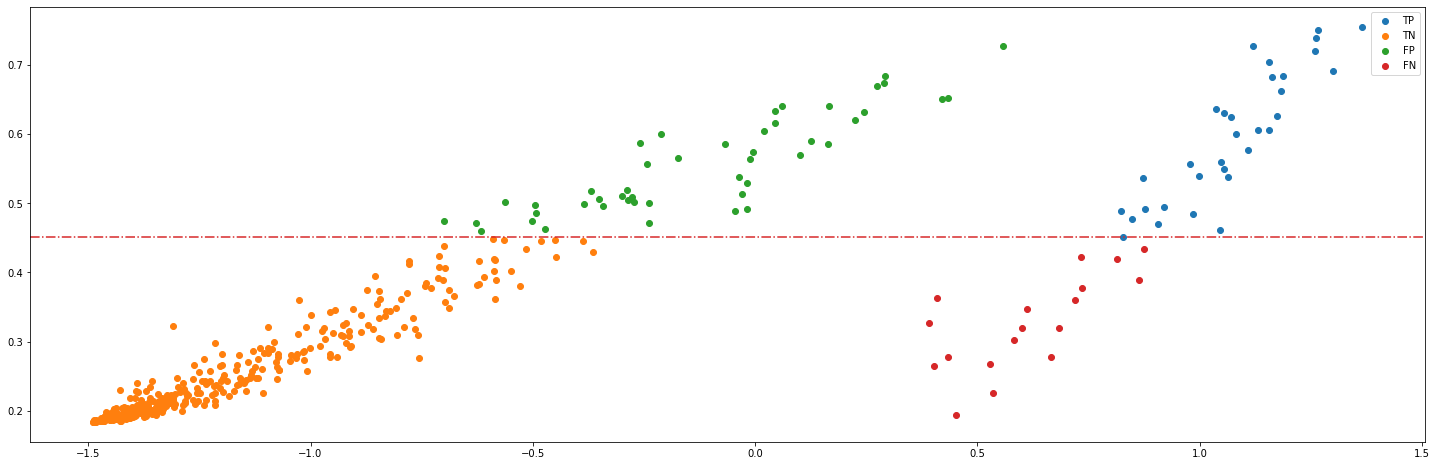

In [153]:
import shap

explainer = shap.TreeExplainer(exp.model)
shap_values = explainer.shap_values(exp.dataset.X_train)
models_expected_value = explainer.expected_value

exp.predictions_df['f_x'] = np.nan
exp.predictions_df['f_x_all'] = np.nan


for idx in range(exp.dataset.num_samples):
    exp.predictions_df.loc[idx, 'f_x'] = exp.shap_values[idx].sum() +  exp.models_expected_value[idx]
    exp.predictions_df.loc[idx, 'f_x_all'] = explainer.shap_values(exp.dataset.X_train)[idx].sum() +  explainer.expected_value
    
exp.predictions_df.sort_values(by='f_x')[['y_pred', 'y_true','f_x', 'TP', 'TN', 'FP', 'FN']]#[:30]

fi(25, 8);ax=plt.gca()
for name in ['TP', 'TN', 'FP', 'FN']:
    plt.scatter(exp.predictions_df[exp.predictions_df[name]==1]['f_x'].to_numpy(), exp.predictions_df[exp.predictions_df[name]==1]['y_pred'].to_numpy(), label=name)
plt.axhline(exp.optimal_threshold, color='tab:red', linestyle='-.');plt.legend()

fi(25, 8);ax=plt.gca()
for name in ['TP', 'TN', 'FP', 'FN']:
    plt.scatter(exp.predictions_df[exp.predictions_df[name]==1]['f_x_all'].to_numpy(), exp.predictions_df[exp.predictions_df[name]==1]['y_pred'].to_numpy(), label=name)
plt.axhline(exp.optimal_threshold, color='tab:red', linestyle='-.');plt.legend()

# Closer look at the Misclassified samples

In [39]:
import shap
explainer = shap.TreeExplainer(exp.model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: [0.11800709]


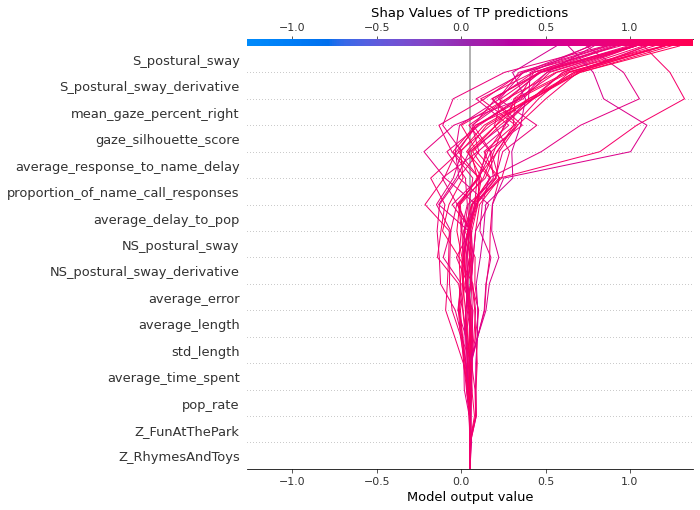

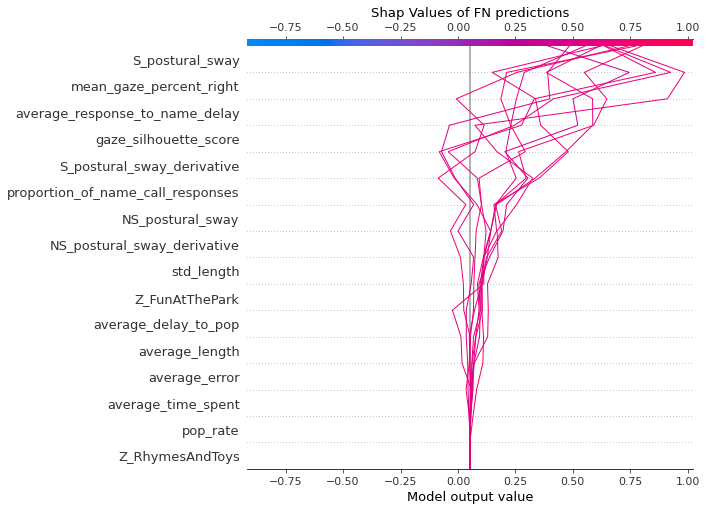

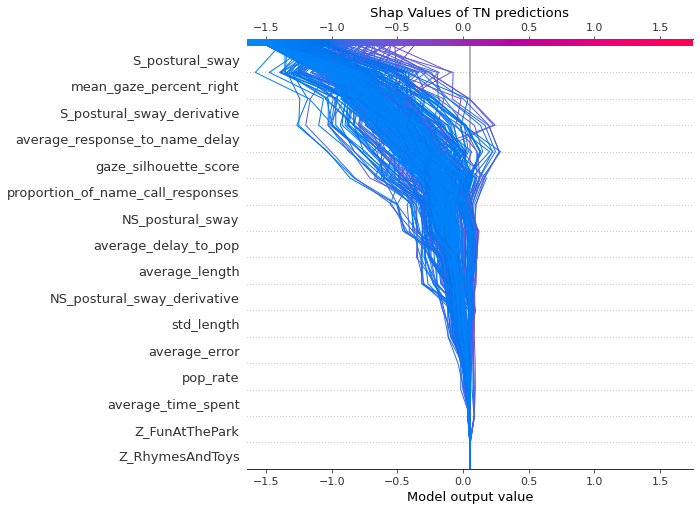

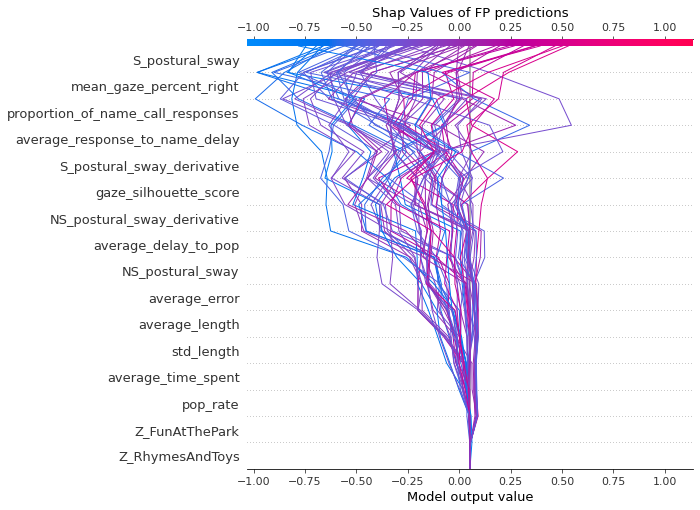

In [157]:
for name in ['TP','FN', 'TN', 'FP']:


    index  = np.array(list(exp.predictions_df[exp.predictions_df[name]==1].index))
    features = exp.predictions_df[exp.features_name]

    shap_values = explainer.shap_values(features)[index]
    shap_interaction_values = explainer.shap_interaction_values(features)
    hap_interaction_values = shap_interaction_values[index]
    shap.decision_plot(expected_value, shap_values, features, title="Shap Values of {} predictions".format(name))